# finalPROJ MOD 10: Sentiment Analysis of Novels 

* DS 5001 - April 11 2024 
* Neil McPherson - nhm5as - from the orig by Raf Alvarado

Use the NRC lexicon to explore sentiment in two novels.

Use this week's code walk through notebook as a template, explore the sentiment of Moby Dick compared to Persuasion.
You can find the Jupyter Notebook from 10.10 and the csv files here. 
Use LIB csv to join with TOKEN2 csv to obtain book names ("book"). 

Use the "book" column to select the two novels to perform sentiment analyses using NRC lexicons by inner joining "term_str" as shown in the code walk through. 

In short, replicate the code walk through notebook along with visualizations for Moby Dick and Persuasion novels.

# Set Up

In [54]:
input_dir = "../finalProj/outputFiles/"

novels_csv = input_dir + 'TOKEN2.csv'
myLibfile = input_dir + 'LIB2.csv'

OHCO = ['book_id', 'chap_num', 'para_num', 'sent_num', 'token_num']
BAG = OHCO  # Books
CHAPS = OHCO[:2] # Chapters
PARAS = OHCO[:3] # Paragraphs
SENTS = OHCO[:4] # Sentences
window = 5


salex_csv = 'salex_nrc.csv'
nrc_cols = "nrc_negative nrc_positive nrc_anger nrc_anticipation nrc_disgust nrc_fear nrc_joy nrc_sadness nrc_surprise nrc_trust".split()
emo = 'polarity'

## Import

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.display import display, HTML

In [56]:
sns.set()
%matplotlib inline

## Get Lexicon

In [57]:
salex = pd.read_csv(salex_csv).set_index('term_str')
salex.columns = [col.replace('nrc_','') for col in salex.columns]

In [58]:
salex_csv

'salex_nrc.csv'

In [59]:
salex

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
term_str,,,,,,,,,,
abandon,0,0,0,1,0,1,0,1,0,0
abandoned,1,0,0,1,0,1,0,1,0,0
abandonment,1,0,0,1,0,1,0,1,1,0
abduction,0,0,0,1,0,1,0,1,1,0
aberration,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
young,0,1,0,0,1,0,1,0,1,0
youth,1,1,0,1,1,0,1,0,1,0
zeal,0,1,0,0,1,0,1,0,1,1


In [60]:
salex['polarity'] = salex.positive - salex.negative

## Get lexicon columns

In [61]:
emo_cols = "anger anticipation disgust fear joy sadness surprise trust polarity".split()

In [62]:
emo_cols 

['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust',
 'polarity']

# Get Novels (really get the TOKENS for the austen/melville novels we created in Mod9 HW) 

In [63]:
TOKENS = pd.read_csv(novels_csv)   ### these are the tokens for a LOT Of melville/austen novels -- all that are in mod9 

In [64]:
TOKENS.head()

,book_id,chap_num,para_num,sent_num,token_num,pos_tuple,pos,token_str,term_str,term_id
0,201,1,1,0,0,"('I', 'PRP')",PRP,I,i,13814
1,201,1,1,0,1,"('call', 'VBP')",VBP,call,call,4124
2,201,1,1,0,2,"('our', 'PRP$')",PRP$,our,our,19395
3,201,1,1,0,3,"('world', 'NN')",NN,world,world,31242
4,201,1,1,0,4,"('Flatland,', 'NNP')",NNP,"Flatland,",flatland,10824


In [65]:
TOKENS = TOKENS.join(salex, on='term_str', how='left')
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [66]:
TOKENS[salex.columns].sample(10)

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,polarity
654043,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
136312,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
1182993,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
1015334,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
1263163,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
355458,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
110588,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
392461,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
799661,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
441809,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0


In [67]:
TOKENS[['term_str'] + emo_cols].sample(10)

,term_str,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,polarity
491642,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
406174,great,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1145063,water,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
356237,i,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161350,where,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1079080,is,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
681594,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
800151,fond,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1454791,must,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
521067,behind,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [69]:
TOKENS.head()

,book_id,chap_num,para_num,sent_num,token_num,pos_tuple,pos,token_str,term_str,term_id,...,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,polarity
0,201,1,1,0,0,"('I', 'PRP')",PRP,I,i,13814,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
1,201,1,1,0,1,"('call', 'VBP')",VBP,call,call,4124,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
2,201,1,1,0,2,"('our', 'PRP$')",PRP$,our,our,19395,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
3,201,1,1,0,3,"('world', 'NN')",NN,world,world,31242,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
4,201,1,1,0,4,"('Flatland,', 'NNP')",NNP,"Flatland,",flatland,10824,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0


## in Mod 9 we used a LIB with only austen and melville books in it I will elect to extract the tokens for the novels in question 

In [70]:
LIB = pd.read_csv(myLibfile)  ## in Mod 9 we used a LIB with only austen and melville books in it 

In [71]:
LIB.head()

,book_id,book_title,author,book_file
0,201,Flatland: A Romance of Many Dimensions,ABBOTT,./allBooks\ABBOTT_EDWIN_ABBOTT_FLATLAND_A_ROMA...
1,62,A Princess of Mars,BURROUGHS,./allBooks\BURROUGHS_EDGAR_RICE_A_PRINCESS_OF_...
2,64,The Gods of Mars,BURROUGHS,./allBooks\BURROUGHS_EDGAR_RICE_THE_GODS_OF_MA...
3,28554,Beyond Lies the Wub,DICK,./allBooks\DICK_PHILIP_K_BEYOND_LIES_THE_WUB-p...
4,32032,Second Variety,DICK,./allBooks\DICK_PHILIP_K_SECOND_VARIETY-pg3203...


###   Here I recyled the code I used in Mod9 HW to extract the tokens for just the two novels I need here --  I certainly could have used a join as the instructions to assigment suggests but this is just as effective

In [72]:
LIB_ABBOTT = LIB[LIB['book_title'] == 'Flatland: A Romance of Many Dimensions'] 
LIB_BURR = LIB[LIB['book_title'] == 'The Gods of Mars'] 

In [73]:
LIB_ABBOTT

,book_id,book_title,author,book_file
0,201,Flatland: A Romance of Many Dimensions,ABBOTT,./allBooks\ABBOTT_EDWIN_ABBOTT_FLATLAND_A_ROMA...


In [74]:
austen_books = LIB_ABBOTT['book_id']
melv_books = LIB_BURR['book_id']
ROMANCE = TOKENS.loc[TOKENS['book_id'].isin(austen_books)]
GODSMARS = TOKENS.loc[TOKENS['book_id'].isin(melv_books)]

<AxesSubplot:title={'center':'ROMANCE - Mean of NRC emotions'}>

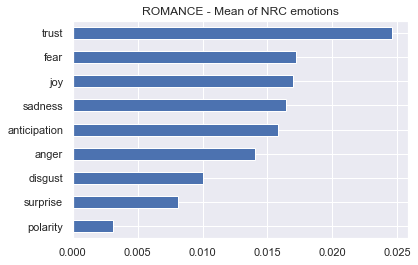

In [75]:
ROMANCE[emo_cols].mean().sort_values().plot.barh(title = "FLATLAND...ROMANCE - Mean of NRC emotions")

<AxesSubplot:title={'center':'Gods of Mars - Mean of NRC emotions'}>

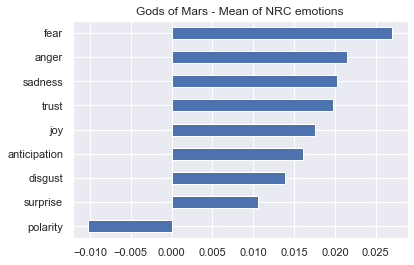

In [76]:
GODSMARS[emo_cols].mean().sort_values().plot.barh(title = "Gods of Mars - Mean of NRC emotions")

# Sentiment by Chapter

In [77]:
ROMANCE_chaps = ROMANCE.groupby(CHAPS)[emo_cols].mean()

In [78]:
GODSMARS_chaps = GODSMARS.groupby(CHAPS)[emo_cols].mean()

In [79]:
def plot_sentiments(df, emo='polarity', title = "YOUR TITLE HERE"):
    FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG, title = title)

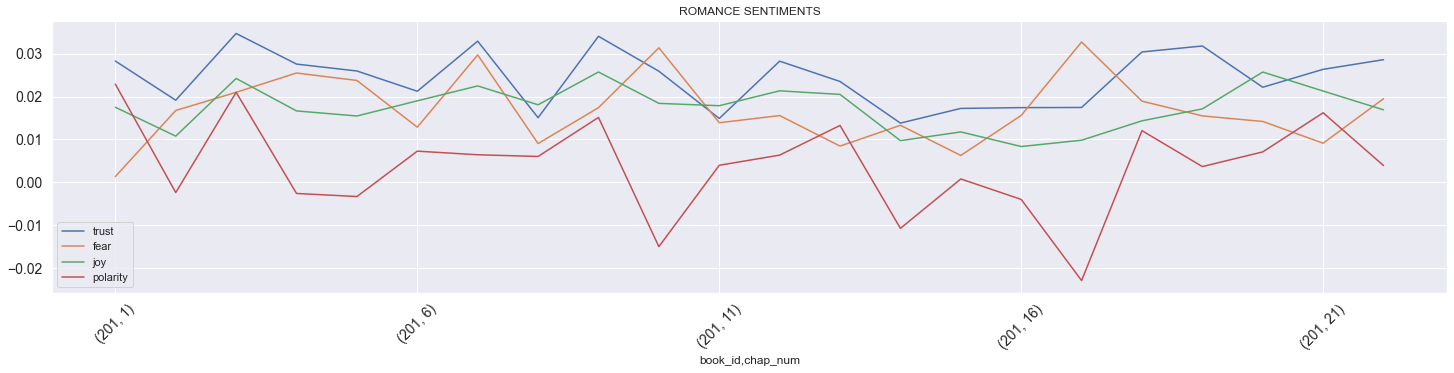

In [80]:
plot_sentiments(ROMANCE_chaps, ['trust','fear','joy','polarity'], "FLATLAND...ROMANCE SENTIMENTS")

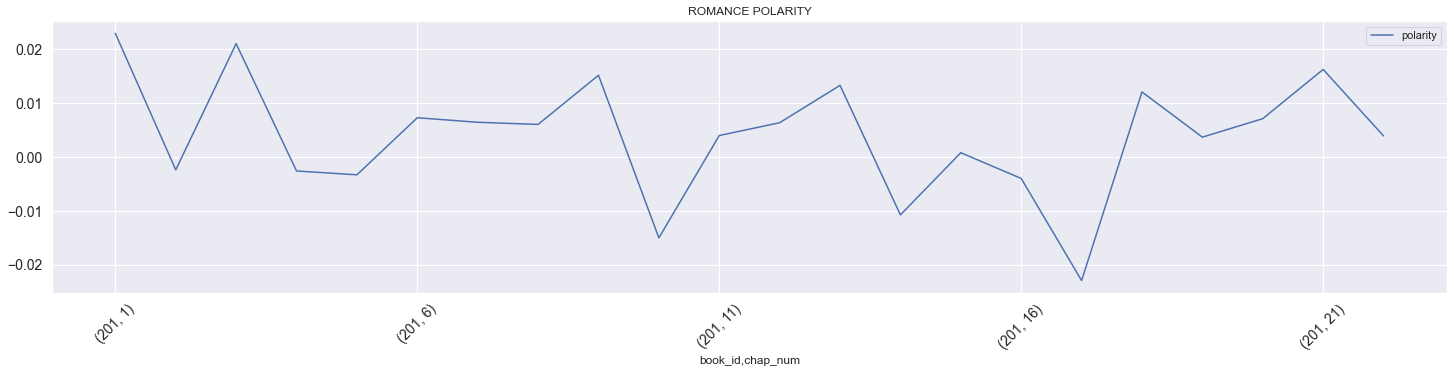

In [81]:
plot_sentiments(ROMANCE_chaps, ['polarity'], "FLATLAND...ROMANCE POLARITY")

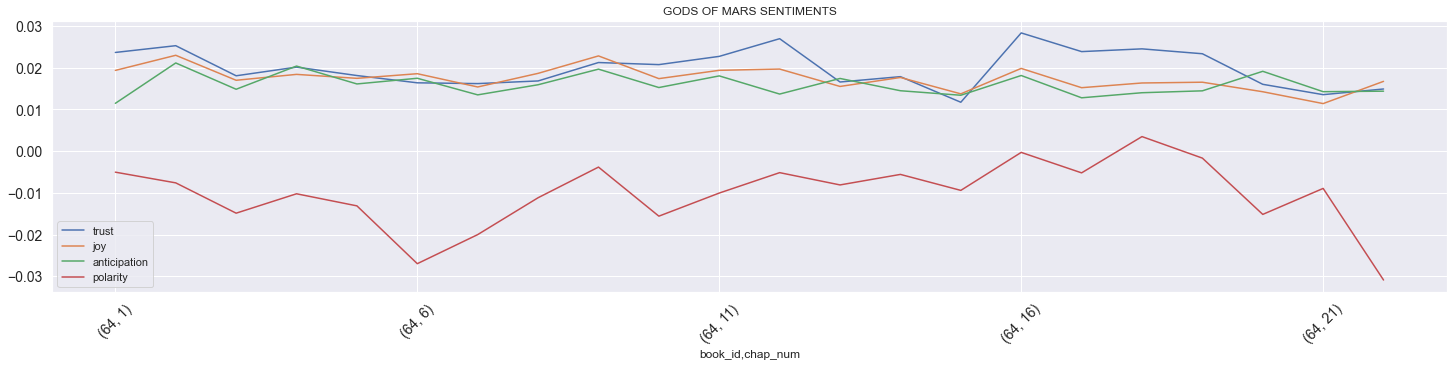

In [82]:
plot_sentiments(GODSMARS_chaps, ['trust','joy','anticipation','polarity'], "GODS OF MARS SENTIMENTS")

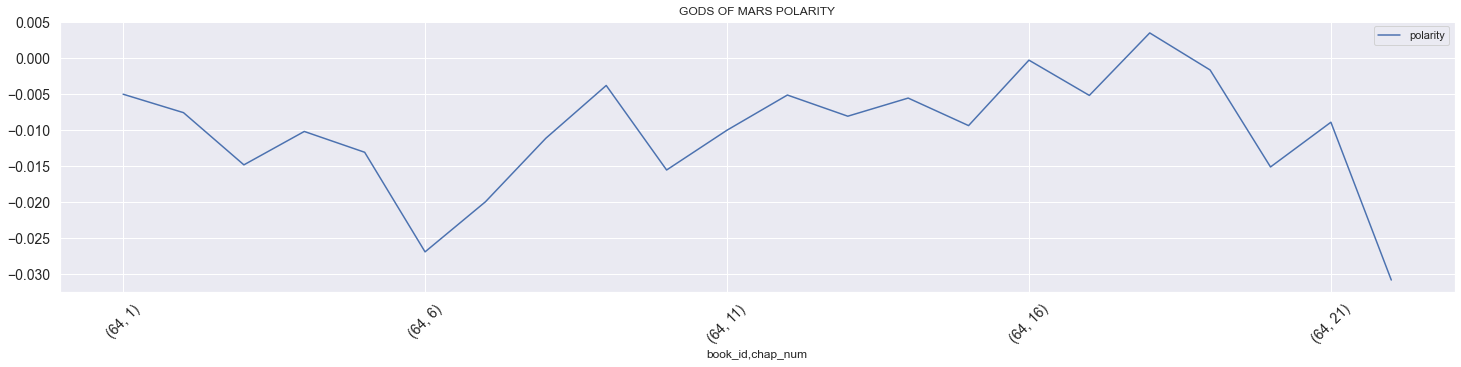

In [83]:
plot_sentiments(GODSMARS_chaps, ['polarity'], "GODS OF MARS POLARITY")

# Explore Sentiment in Texts

In [84]:
pd.options.mode.chained_assignment = None  # default='warn'   this just supresses a warning created below by the assignment of the html col

ROMANCE['html'] =  ROMANCE.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.token_str), 1)
GODSMARS['html'] =  GODSMARS.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.token_str), 1)

In [85]:
ROMANCE['html'].sample(10)

10218              <span class='sent0'>of</span>
11714             <span class='sent0'>the</span>
18               <span class='sent0'>you,</span>
17782            <span class='sent0'>down</span>
505              <span class='sent0'>have</span>
5297               <span class='sent0'>of</span>
6993     <span class='sent0'>impartially,</span>
28192              <span class='sent0'>of</span>
13900               <span class='sent0'>a</span>
2625            <span class='sent0'>comes</span>
Name: html, dtype: object

In [86]:
ROMANCE_sents = ROMANCE.groupby(SENTS)[emo_cols].mean()
GODSMARS_sents = GODSMARS.groupby(SENTS)[emo_cols].mean()

In [87]:
ROMANCE_sents['sent_str'] = ROMANCE.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
ROMANCE_sents['html_str'] = ROMANCE.groupby(SENTS).html.apply(lambda x: x.str.cat(sep=' '))

In [88]:
GODSMARS_sents['sent_str'] = GODSMARS.groupby(SENTS).term_str.apply(lambda x: x.str.cat(sep=' '))
GODSMARS_sents['html_str'] = GODSMARS.groupby(SENTS).html.apply(lambda x: x.str.cat(sep=' '))

In [89]:
def sample_sentences(df):
    rows = []
    for idx in df.sample(10).index:

        valence = round(df.loc[idx, emo], 4)     
        t = 0
        if valence > t: color = '#ccffcc'
        elif valence < t: color = '#ffcccc'
        else: color = '#f2f2f2'
        z=0
        rows.append("""<tr style="background-color:{0};padding:.5rem 1rem;font-size:110%;">
        <td>{1}</td><td>{3}</td><td width="400" style="text-align:left;">{2}</td>
        </tr>""".format(color, valence, df.loc[idx, 'html_str'], idx))

    display(HTML('<style>#sample1 td{font-size:120%;vertical-align:top;} .sent-1{color:red;font-weight:bold;} .sent1{color:green;font-weight:bold;}</style>'))
    display(HTML('<table id="sample1"><tr><th>Sentiment</th><th>ID</th><th width="600">Sentence</th></tr>'+''.join(rows)+'</table>'))

In [99]:
sample_sentences(ROMANCE_sents)

Sentiment,ID,Sentence
0.0,"(201, 1, 2, 1)","Alas, a few years ago, I should have said ""my universe"": but now my mind has been opened to higher views of things."
-0.0408,"(201, 22, 13, 3)","Since that time, scarcely a week has passed during seven whole years, without his hearing from me a repetition of the part I played in that manifestation, together with ample descriptions of all the phenomena in Spaceland, and the arguments for the existence of Solid things derivable from Analogy."
0.0,"(201, 6, 10, 0)","It will be obvious, to every child in Spaceland who has touched the threshold of Geometrical Studies, that, if I can bring my eye so that its glance may bisect an angle (A) of the approaching stranger, my view will lie as it were evenly between his two sides that are next to me (viz."
-0.1429,"(201, 4, 13, 4)","Hence, in their fits of fury, they remember no claims and recognize no distinctions."
0.0,"(201, 18, 14, 0)",SPHERE.
0.0,"(201, 7, 5, 0)",But I am insulting the intelligence of my Readers by accumulating details which must be patent to everyone who enjoys the advantages of a Residence in Spaceland.
0.0,"(201, 17, 11, 3)","I exclaimed; ""never will I release thee; thou shalt pay the penalty of thine impostures."""
0.0,"(201, 7, 7, 3)",Are the houses and doors and churches in Flatland to be altered in order to accommodate such monsters?
0.0244,"(201, 11, 6, 1)","If it were so, the number of sides in a Circle would be a mere question of pedigree and arithmetic, and the four hundred and ninety seventh descendant of an Equilateral Triangle would necessarily be a Polygon with five hundred sides."
0.0339,"(201, 11, 8, 2)","Yet so strong is the parental ambition among those Polygons who are, as it were, on the fringe of the Circular class, that it is very rare to find a Nobleman of that position in society, who has neglected to place his first born in the Circular Neo Therapeutic Gymnasium before he has attained the age of a month."


In [100]:
sample_sentences(GODSMARS_sents)

Sentiment,ID,Sentence
0.0349,"(64, 16, 68, 1)","His notes contain many Martian tables, and a great volume of scientific data, but since the International Astronomic Society is at present engaged in classifying, investigating, and verifying this vast fund of remarkable and valuable information, I have felt that it will add nothing to the interest of Captain Carter’s story or to the sum total of human knowledge to maintain a strict adherence to the original manuscript in these matters, while it might readily confuse the reader and detract from the interest of the history."
0.0,"(64, 10, 84, 2)",The watchers upon the larger vessels see to all about them.
0.0,"(64, 10, 63, 1)",“Mine will come soon.
-0.0312,"(64, 5, 62, 1)","Like well schooled terriers, they paced the corridors with us, but I could not help but note the lathering jowls, nor the hungry expressions with which they eyed Tars Tarkas and myself."
0.0,"(64, 2, 22, 0)","At length, however, we reached the shadows of the forest, while right behind us sprang the swiftest of our pursuers a giant plant man with claws outreaching to fasten his bloodsucking mouths upon us."
-0.0345,"(64, 2, 38, 0)","“In with you, Tars Tarkas,” I cried, but he would not go; saying that his bulk was too great for the little aperture, while I might slip in easily."
-0.0526,"(64, 6, 27, 1)","“That would soon put a stop to the attacks, or at least the blacks would scarce be so bold."
-0.0435,"(64, 1, 12, 0)",As I rose to investigate further I experienced the same ridiculous catastrophe that had met my first attempt to walk under Martian conditions.
-0.1667,"(64, 16, 40, 2)","Where have you been, John Carter?”"
0.0,"(64, 17, 13, 2)",Justice!” and Zat Arras dared not deny them.


# VADER

In [92]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [93]:
ROMANCE_vader_cols = ROMANCE_sents.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
ROMANCE_vader = pd.concat([PERSUASION_sents, PERSUASION_vader_cols], axis=1)

In [94]:
# ROMANCE_vader.head()

<AxesSubplot:title={'center':'FLATLAND...ROMANCE COMPOUND - aka the PLOT!'}, xlabel='book_id,chap_num,para_num,sent_num'>

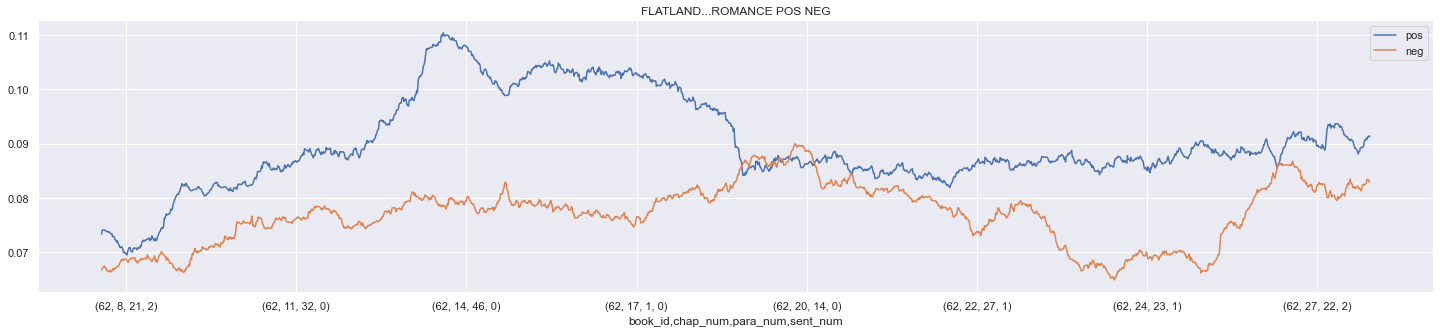

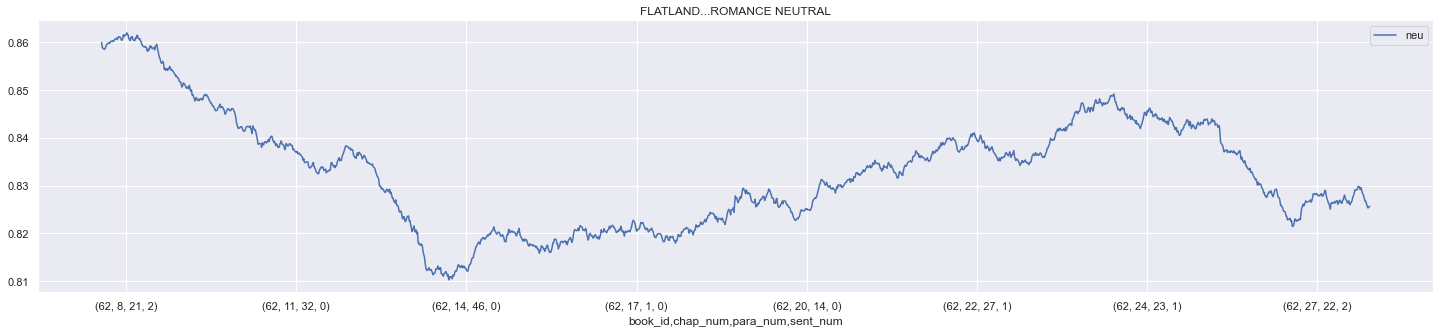

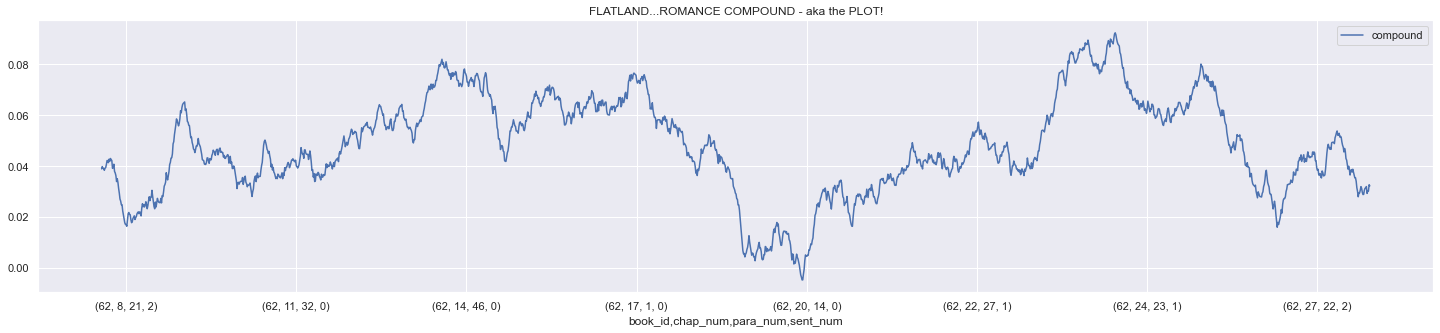

In [101]:
w = int(PERSUASION_vader.shape[0] / 5)
ROMANCE_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5), title = "FLATLAND...ROMANCE POS NEG")
ROMANCE_vader[['neu']].rolling(w).mean().plot(figsize=(25,5), title = "FLATLAND...ROMANCE NEUTRAL")
ROMANCE_vader[['compound']].rolling(w).mean().plot(figsize=(25,5), title = "FLATLAND...ROMANCE COMPOUND - aka the PLOT!")

<AxesSubplot:title={'center':'GODS of MARS - the PLOT line!'}, xlabel='book_id,chap_num,para_num,sent_num'>

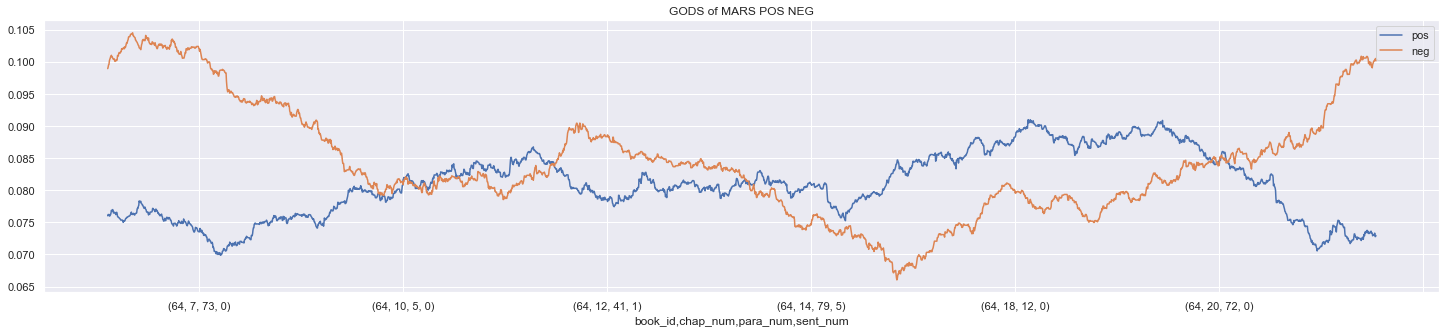

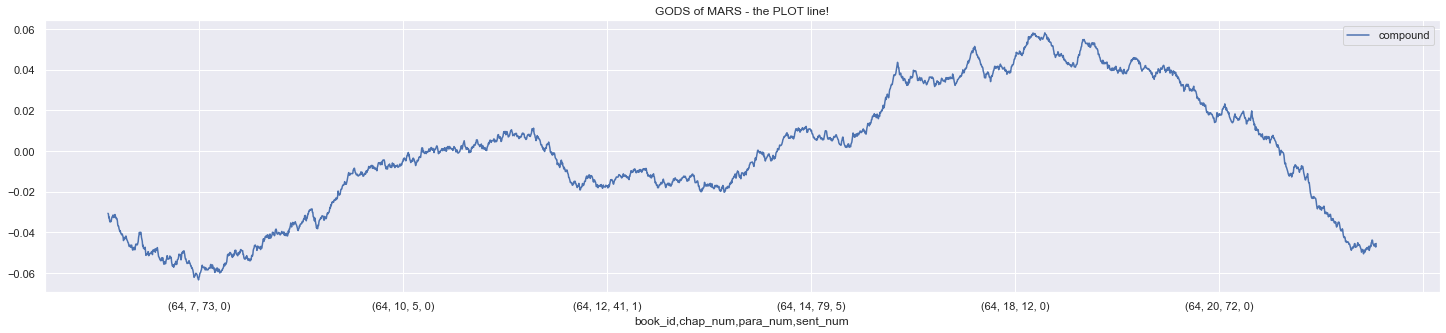

In [97]:
w = int(GODSMARS_vader.shape[0] / 5)
GODSMARS_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5), title = "GODS of MARS POS NEG")
GODSMARS_vader[['compound']].rolling(w).mean().plot(figsize=(25,5), title = "GODS of MARS - the PLOT line!")

###   all in all a very cool exercise here !   nhm5as..... Neil McPherson 